In [23]:
#Célula reservada para importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [24]:
x = np.arange(-4, 4, 0.1)
print(x)

[-4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  3.55271368e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000

In [25]:
print("Tipo de dado: {}".format(x.dtype))

Tipo de dado: float64


In [26]:
print("Quantidade de amostras: {}".format(x.shape[0]))

Quantidade de amostras: 80


In [27]:
#f(x) = 1/(1 + e^-x)
def sigmoide(x,beta):
    res = 1/(1 + np.exp(-beta*x)), x
    return res

In [28]:
def dsigmoide(x):
    res = x * (1 - x)
    return res

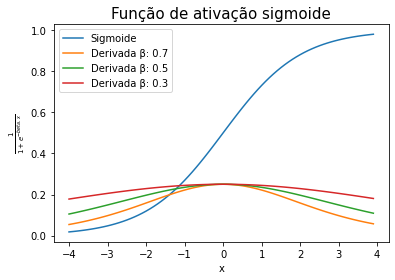

In [29]:
x_sig, x = sigmoide(x, 1.0)
a_sig, a = sigmoide(x, 0.7)
b_sig, b = sigmoide(x, 0.5)
c_sig, c = sigmoide(x, 0.3)

plt.plot(x, x_sig, label="Sigmoide")
plt.plot(a,dsigmoide(a_sig), label="Derivada \u03B2: 0.7")
plt.plot(b,dsigmoide(b_sig), label="Derivada \u03B2: 0.5")
plt.plot(c,dsigmoide(c_sig), label="Derivada \u03B2: 0.3")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel(r"$\frac{1}{1 + e^{-beta.x}}$")
plt.title("Função de ativação sigmoide", fontsize=15)
plt.show()

In [30]:
#Função de ativação RELU e sua derivada
def relu(x):
    res = np.maximum(0,x), x
    return res

def d_relu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

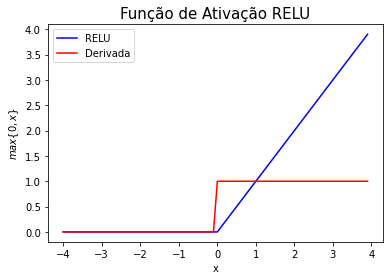

In [31]:
relu, x = relu(x)

plt.plot(x, relu, 'b', label="RELU")
plt.plot(a, d_relu(relu), 'r', label="Derivada")
plt.xlabel("x")
plt.ylabel(r"$max\{0, x\}$")
plt.legend(loc="upper left")
plt.title("Função de Ativação RELU", fontsize=15)
plt.show()

In [43]:
def linear(x):
    return x, x

def d_linear():
    return 1

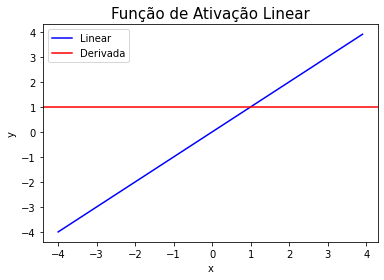

In [44]:
retaL, x = linear(x)
retaDerivadaL = d_linear()

plt.plot(x, retaL, 'b', label="Linear")
plt.axhline(y=retaDerivadaL, xmin=x[0], xmax=x[-1], color = 'r', label="Derivada")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Função de Ativação Linear", fontsize=15)
plt.show()

In [45]:
def tangente_hiperbolica(x):
    return np.tanh(x), x

def d_tangente_hiperbolica(x):
    return 1 - np.square(x)

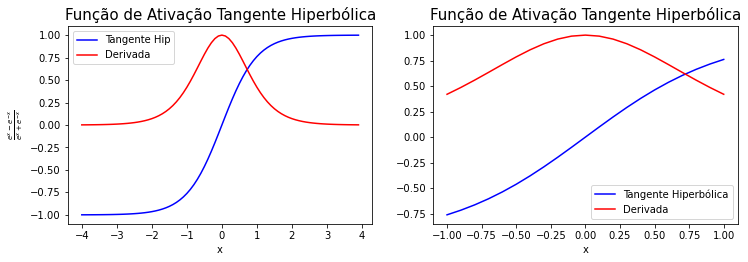

In [46]:
x_th, x = tangente_hiperbolica(x)
x_intervalo = x[(x >= -1.0) & (x < 1.1)]

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, x_th, 'b', label="Tangente Hip")
plt.plot(x, d_tangente_hiperbolica(x_th), 'r', label="Derivada")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel(r"$\frac{e^x - e^{-x}}{e^x + e^{-x}}$")
plt.title("Função de Ativação Tangente Hiperbólica", fontsize=15)

plt.subplot(2, 2, 2)
x2_th, x2 = tangente_hiperbolica(x_intervalo)
plt.plot(x2, x2_th, 'b', label="Tangente Hiperbólica")
plt.plot(x2, d_tangente_hiperbolica(x2_th), 'r', label="Derivada")
plt.legend(loc="lower right")
plt.xlabel("x")
plt.title("Função de Ativação Tangente Hiperbólica", fontsize=15)

plt.show()

In [47]:
def gaussiana(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

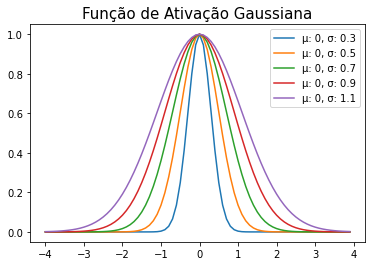

In [48]:
for mu, sig in [(0, 0.3), (0, 0.5), (0, 0.7), (0, 0.9), (0, 1.1)]:
    plt.plot(x, gaussiana(x, mu, sig), label = "\u03BC: {}, \u03C3: {}".format(mu, sig))
plt.legend(loc="upper right")
plt.title("Função de Ativação Gaussiana", fontsize=15)
plt.show()


In [49]:
def leaky_relu(x):
    return np.maximum(0.1 * x, x), x

def d_leaky_relu(x):
    z = np.ones_like(x)
    z[x < 0] = 0.01
    return z, x

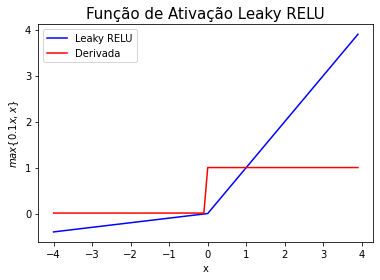

In [50]:
retaLR, x = leaky_relu(x)
retaDerivadaLR, zx = d_leaky_relu(x)

plt.plot(x, retaLR, 'b', label="Leaky RELU")
plt.plot(zx, retaDerivadaLR, 'r', label="Derivada")
plt.xlabel("x")
plt.legend(loc="upper left")
plt.ylabel(r"$max\{0.1x, x\}$")
plt.title("Função de Ativação Leaky RELU", fontsize=15)
plt.show()